In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
import altair as alt
import ast


In [56]:
# Load the CSV file
data = pd.read_csv('elasticsearch_data.csv')

In [57]:
# Define a function to extract the first category
def extract_first_category(categories):
    try:
        categories_list = ast.literal_eval(categories)
        if categories_list:
            return categories_list[0].strip()
    except (ValueError, SyntaxError, IndexError):
        pass
    return None

# Apply the function to the "title_categories" column
data['first_category'] = data['title_categories'].apply(extract_first_category)

# Drop rows with None in the "first_category" column
data = data.dropna(subset=['first_category'])

In [58]:
data.head()

,category,title_categories,summarize_categories,title,author,fascicle,year,start_page,end_page,pdf_link,id,first_category
0,"['Filosofía', 'Política', 'Filosofía y Política']",['Determinismo'],"['Determinismo', 'Vida', 'Variedad', 'Sucesión...",El determinismo,Juan Zaragüeta Bengoechea,1,1973,9,20,abrir_pdf.php?id=ANU-M-1973-10000900020,ANU-M-1973-10000900020,Determinismo
1,"['Filosofía', 'Política', 'Filosofía y Política']","['Ciudades', 'Formas', 'Convivencia']","['Ciudad', 'Ciudades', 'Vida', 'Social', 'Pobl...",Las nuevas ciudades: hacia nuevas formas de co...,Manuel Fraga Iribarne,1,1973,21,51,abrir_pdf.php?id=ANU-M-1973-10002100051,ANU-M-1973-10002100051,Ciudades
2,"['Filosofía', 'Política', 'Filosofía y Política']","['Aggiornamento', 'Clasificación', 'Formas', '...","['Democracia', 'Forma', 'Pueblo', 'Anarquía', ...","""Aggiornamento"" de la clasificación de las for...",Antonio Perpiñá Rodríguez,1,1973,53,71,abrir_pdf.php?id=ANU-M-1973-10005300071,ANU-M-1973-10005300071,Aggiornamento
3,"['Filosofía', 'Política', 'Filosofía y Política']",['Formulaciones'],"['Consejo', 'Cortes', 'Gobierno', 'Leyes']",Las formulaciones constitucionales,José María Cordero Torres,1,1973,73,108,abrir_pdf.php?id=ANU-M-1973-10007300108,ANU-M-1973-10007300108,Formulaciones
4,"['Sociología', 'Economía', 'Sociología y Econo...","['Progreso', 'Crisis', 'Cambio']","['Historia', 'Desarrollo', 'Idea', 'Evolución'...",Progreso y crisis en el cambio histórico,Carlos Ruiz del Castillo,1,1973,111,128,abrir_pdf.php?id=ANU-M-1973-10011100128,ANU-M-1973-10011100128,Progreso


In [59]:
data.loc[:,"first_category"]

0        Determinismo
1            Ciudades
2       Aggiornamento
3       Formulaciones
4            Progreso
            ...      
1688     Presentación
1689     Presentación
1690     Presentación
1691          Crónica
1692    Disertaciones
Name: first_category, Length: 1680, dtype: object

In [60]:
data['first_category'].fillna('[]', inplace=True)
# Extract the 'Category' column as a list of lists (each article's categories)
categories_list = [categories.split(', ') for categories in data['first_category']]

# Initialize MultiLabelBinarizer to create binary matrix for categories
mlb = MultiLabelBinarizer()
categories_matrix = mlb.fit_transform(categories_list)

# Convert the binary matrix to a DataFrame
categories_df = pd.DataFrame(categories_matrix, columns=mlb.classes_)

# Concatenate the new categories DataFrame with the original data
data = pd.concat([data, categories_df], axis=1)



In [61]:
data.head()

,category,title_categories,summarize_categories,title,author,fascicle,year,start_page,end_page,pdf_link,...,Vista,Vitoria,Vocabulario,Voté,Vueltas,Vía,Washington,Zubiri,Ética,Éxitos
0,"['Filosofía', 'Política', 'Filosofía y Política']",['Determinismo'],"['Determinismo', 'Vida', 'Variedad', 'Sucesión...",El determinismo,Juan Zaragüeta Bengoechea,1.0,1973.0,9.0,20.0,abrir_pdf.php?id=ANU-M-1973-10000900020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Filosofía', 'Política', 'Filosofía y Política']","['Ciudades', 'Formas', 'Convivencia']","['Ciudad', 'Ciudades', 'Vida', 'Social', 'Pobl...",Las nuevas ciudades: hacia nuevas formas de co...,Manuel Fraga Iribarne,1.0,1973.0,21.0,51.0,abrir_pdf.php?id=ANU-M-1973-10002100051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Filosofía', 'Política', 'Filosofía y Política']","['Aggiornamento', 'Clasificación', 'Formas', '...","['Democracia', 'Forma', 'Pueblo', 'Anarquía', ...","""Aggiornamento"" de la clasificación de las for...",Antonio Perpiñá Rodríguez,1.0,1973.0,53.0,71.0,abrir_pdf.php?id=ANU-M-1973-10005300071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Filosofía', 'Política', 'Filosofía y Política']",['Formulaciones'],"['Consejo', 'Cortes', 'Gobierno', 'Leyes']",Las formulaciones constitucionales,José María Cordero Torres,1.0,1973.0,73.0,108.0,abrir_pdf.php?id=ANU-M-1973-10007300108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Sociología', 'Economía', 'Sociología y Econo...","['Progreso', 'Crisis', 'Cambio']","['Historia', 'Desarrollo', 'Idea', 'Evolución'...",Progreso y crisis en el cambio histórico,Carlos Ruiz del Castillo,1.0,1973.0,111.0,128.0,abrir_pdf.php?id=ANU-M-1973-10011100128,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Select the features you want to use for clustering
# For example, you can select the categories and/or title features
selected_features = data.drop(['id', 'category', 'title', 'author', 'fascicle', 'year', 'start_page', 'end_page', 'pdf_link','title_categories','summarize_categories','first_category'], axis=1)

from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the selected features
selected_features = imputer.fit_transform(selected_features)

# Choose the number of clusters
num_clusters = 200  # You can adjust this based on your problem

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
data['cluster'] = kmeans.fit_predict(selected_features)
kmeans.inertia_

740.0000000000002

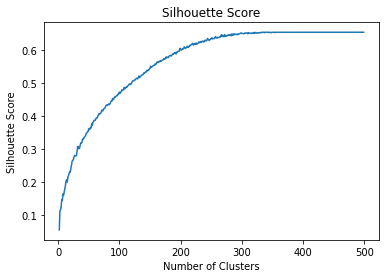

In [70]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# List to store silhouette scores
silhouette_scores = []
for i in range(2, 500):  # Test a range of cluster numbers
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    labels = kmeans.fit_predict(selected_features)
    silhouette_scores.append(silhouette_score(selected_features, labels))

plt.plot(range(2, 500), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

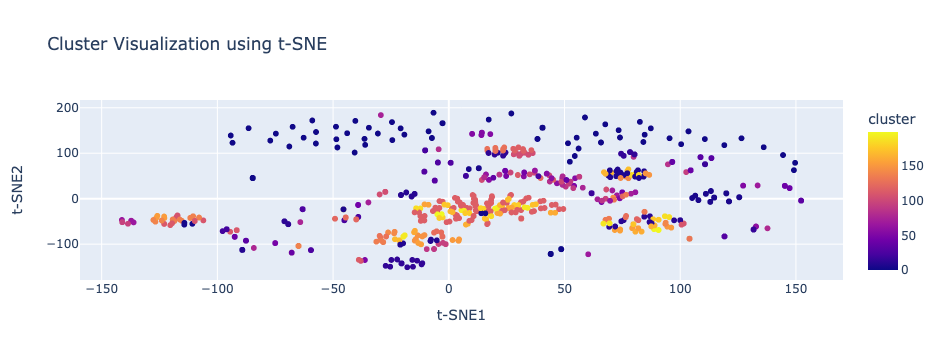

In [73]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(selected_features)

# Add the reduced features back to the DataFrame
data['t-SNE1'] = reduced_features[:, 0]
data['t-SNE2'] = reduced_features[:, 1]

# Use Plotly to create an interactive scatter plot
fig = px.scatter(data, x='t-SNE1', y='t-SNE2', color='cluster', title='Cluster Visualization using t-SNE')
fig.show()


In [74]:
# Create a graph
G = nx.Graph()

# Add nodes (categories)
categories = data['first_category'].unique()
G.add_nodes_from(categories)

# Create edges (connections between categories)
# Here, you would need to define the criteria for establishing connections

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_features = tsne.fit_transform(selected_features)

# Create a DataFrame with reduced features and category labels
tsne_df = pd.DataFrame(reduced_features, columns=['t-SNE1', 't-SNE2'])
tsne_df['category'] = data['first_category']

# Create the Altair scatter plot
scatter = alt.Chart(tsne_df).mark_circle().encode(
    x='t-SNE1',
    y='t-SNE2',
    color=alt.Color('category:N', scale=alt.Scale(scheme='category20')),
    tooltip=['category', 't-SNE1', 't-SNE2']
).properties(
    title='Category Relationships Network Graph (Altair)'
)

# Show the plot
scatter.interactive()

alt.Chart(...)